# Mouvement rétrograde de Mars



Tous les deux ans, si l'on regarde la position de Mars depuis la Terre par rapport à la voûte céleste, la planète rouge semble faire un bref demi-tour, avant de repartir dans le même sens. Ce mouvement rétrograde est observé depuis l'antiquité.

Le but de ce mini-projet est de construire un modèle reproduisant ce phénomène.

## À la maison

Rappelez les équations du mouvement $X(t),Y(t)$ pour un mouvement circulaire uniforme de rayon $R$, de période $T$ et de phase à l'origine $\phi$. 

Réponse : $X(t) = R \cos (\frac{2 \pi t}{T} + \phi)$ et $Y(t) = R \sin (\frac{2 \pi t}{T} + \phi)$

Dans quelle direction (quel angle par rapport à la direction de l'axe $X$) pointe l'objet à la date $t=0$ ?

Réponse : $\phi$

## Données

Le fichier DataMars.csv contient les coordonnées (longitude et latitude) de la position de Mars par rapport au centre de la Terre en fonction de la date entre 2015 et 2017. Notons que la latitude est définie ici par rapport au plan de l'écliptique. 

Le centre de la boucle peut s'observer à la date du 25 mai 2016, à la longitude de 240.5°.



>**NOTE**  
>Pour lire fichier csv, on peut utiliser la fonction `read_csv` du module Pandas, en utilisant l'option `comment = '#'`


*(DataMars.csv a été construit à partir des données de http://vo.imcce.fr/webservices/miriade/?forms)*


## Modèle

Vous allez utiliser un modèle bidimensionnel du mouvement de la Terre et de Mars autour du Soleil. On considérera le mouvement des deux planètes comme circulaire uniforme et contenu dans le plan de l'écliptique.

Ce modèle vous permettra de calculer la longitude de Mars vue depuis la Terre (i.e. l'angle $\phi_{app}$ dans le réferentiel géocentrique) en fonction du temps.

>**NOTE**  
>La fonction `numpy.arctan(y / x)` donnant un résultat entre $-\frac{\pi}{2}$ et $\frac{\pi}{2}$, nous vous conseillons de lui préférer la fonction `numpy.arctan2(y, x)` qui donne un résultat entre $-\pi$ et $\pi$.

Vous pourrez ensuite comparer le modèle (longitude calculée) aux données astronomiques (longitude mesurée).

>**INDICE**  
>Le mouvement rétrograde apparent s'observe quand, dans le réferentiel héliocentrique, la Terre "dépasse" Mars. Au "milieu" du mouvement rétrograde la Terre et Mars sont donc dans la même direction par rapport au Soleil (Soleil, Terre et Mars sont alignés). En choisissant judiciseusement la date $t=0$ et la phase à l'origine pour les deux planètes, on peut faire coïncider le modèle aux données à cet instant.


### Grandeurs utiles :

Rayon de l'orbite de la Terre : 1 UA  
Période de révolution de la Terre : 365.256 jours  
Rayon de l'orbite de Mars : 1.52371 UA  
Période de révolution de Mars : 686.885 jours


## Méthodes

Vous allez utiliser une représentation graphique pour illustrer votre modèle. Pour cela, il faut représenter sur un graphique à la fois les données et le modèle. Vous prendrez un soin particulier pour que le graphique soit lisible et compréhensible.

### Importation des libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Définition des paramètres

In [2]:
T_E = 365      # période de révolution de la Terre
R_E = 1        # Rayon de la Terre
T_M = 687      # Période de révolution de Mars
R_M = 1.52371  # Rayon de Mars

### Extraction des données du fichier `csv`

In [3]:
df = pd.read_csv('DataMars.csv',comment='#')  # définition du dataFrame
date = np.array(df['Date'], dtype='datetime64[D]')  # extraction dans un np.array de la Serie des dates
long_data= np.array(df['Longitude (decimal)'])  # extraction dans un np.array de la Serie des longitudes

In [4]:
num_of_date = date.size

### Création des longitudes analytiques

In [5]:
def coords(t, R, T, phi):
    """retourne les X et Y de la position de l'objet"""
    return [R * np.cos(2*np.pi*t/T + phi), R * np.sin(2*np.pi*t/T + phi)]

In [6]:
phi = 240.5*(np.pi/180)   # Valeur de la phase déterminée par essai-erreur

In [7]:
date_start = -506  # valeur de l'origine des temps déterminé par essai-erreur
date_end   =  494  # valeur du temp final par essai erreur

In [8]:
times = np.linspace(date_start, date_end, num_of_date)

In [9]:
X_T, Y_T = coords(times, R_E, T_E, phi)
X_M, Y_M = coords(times, R_M, T_M, phi)

In [10]:
long_model = np.arctan2(Y_M-Y_T,X_M-X_T)*(180/np.pi) + 360

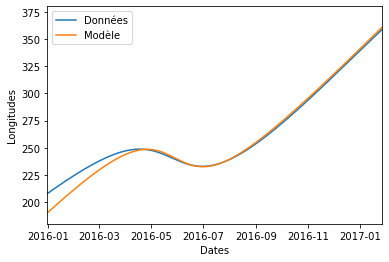

In [11]:
plt.xlabel('Dates')
plt.ylabel('Longitudes')
plt.xlim(16800,17193)
plt.ylim(180,380)
plt.plot(date, long_data, label='Données')
plt.plot(date, long_model, label='Modèle')
plt.legend()